## Introduction to Facebook Prophet

Facebook Prophet is an open-source time series forecasting tool developed by Meta’s Core Data Science team.  
It is highly effective for financial time series like Bitcoin prices.

---

### Why Use Prophet?

- Automatically detects and models trends and seasonality.
- Handles missing data and outliers.
- Provides uncertainty intervals for predictions.
- Allows modeling of special events (e.g., Bitcoin halving events).
- Generates intuitive plots.

---

### Prophet Model Equation:

\[
y(t) = g(t) + s(t) + h(t) + \epsilon_t
\]

- **g(t)**: Trend Function (Linear or Logistic Growth)  
- **s(t)**: Seasonality (Yearly, Weekly, Monthly)  
- **h(t)**: Special Events or Holidays  
- **εt**: Error/Noise Term  


 ## Import Libraries and Project Wrappers

In [ ]:
from utils import (load_historical_data,fetch_live_data,merge_and_clean_data,create_prophet_model,
                             train_prophet_model,make_forecast,plot_forecast)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Load Historical and Real-Time Bitcoin Data

In [14]:
# Load historical Bitcoin data
historical_btc_df = load_historical_data('../data/bitcoin_historical_data.csv')
historical_btc_df.head()

,ds,y
0,2012-01-01,4.84
1,2012-01-02,5.00
2,2012-01-03,5.29
3,2012-01-04,5.57
4,2012-01-05,6.42


In [15]:
# Fetch live Bitcoin prices from API
live_btc_df = fetch_live_data(days=365, currency='usd')
live_btc_df.head()

,ds,y
0,2024-05-18,67053.123265
1,2024-05-19,66912.618614
2,2024-05-20,66252.712596
3,2024-05-21,71430.297002
4,2024-05-22,70189.835818


In [16]:
# Merge historical and live data
bitcoin_data_df = merge_and_clean_data(historical_btc_df, live_btc_df)
bitcoin_data_df.head()

,ds,y
0,2012-01-01,4.84
1,2012-01-02,5.00
2,2012-01-03,5.29
3,2012-01-04,5.57
4,2012-01-05,6.42


## Build and Train Prophet Model

In [19]:
# Create and Configure Prophet Model
api_btc_model = create_prophet_model()

In [21]:
# Train the Prophet Model on Merged BTC Data
trained_btc_model = train_prophet_model(btc_model, bitcoin_data_df)

07:02:50 - cmdstanpy - INFO - Chain [1] start processing
07:02:51 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting Bitcoin Prices

In [22]:
# Forecast Next 365 Days of BTC Prices
forecast_btc = make_forecast(trained_btc_model, periods=365)
forecast_btc.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,-383.578021,-6322.892844,7413.253528,-383.578021,-383.578021,961.972451,961.972451,961.972451,-12.558854,-12.558854,-12.558854,974.531305,974.531305,974.531305,0.0,0.0,0.0,578.394430
1,2012-01-02,-382.465179,-5937.433055,7487.774665,-382.465179,-382.465179,986.920228,986.920228,986.920228,-7.480877,-7.480877,-7.480877,994.401105,994.401105,994.401105,0.0,0.0,0.0,604.455048
2,2012-01-03,-381.352337,-5903.580007,7409.327674,-381.352337,-381.352337,983.365918,983.365918,983.365918,-28.641739,-28.641739,-28.641739,1012.007657,1012.007657,1012.007657,0.0,0.0,0.0,602.013580
3,2012-01-04,-380.239495,-6398.033552,7042.001504,-380.239495,-380.239495,1052.131482,1052.131482,1052.131482,25.481778,25.481778,25.481778,1026.649703,1026.649703,1026.649703,0.0,0.0,0.0,671.891986
4,2012-01-05,-379.126653,-6234.822948,7361.126066,-379.126653,-379.126653,1052.014838,1052.014838,1052.014838,14.335626,14.335626,14.335626,1037.679212,1037.679212,1037.679212,0.0,0.0,0.0,672.888184


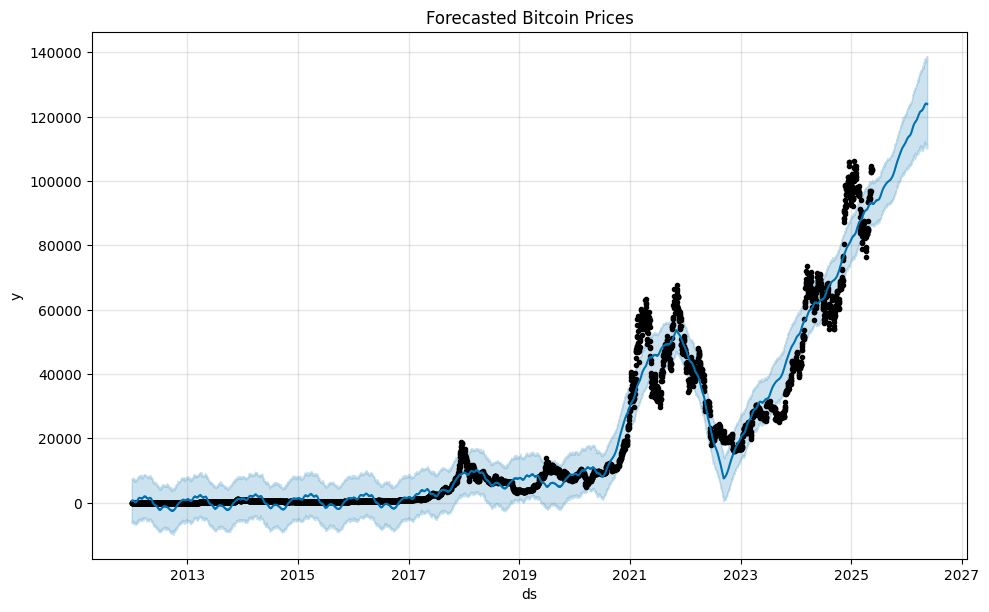

In [23]:
# Plot Forecasted BTC Prices
forcast_prices = trained_btc_model.plot(forecast_btc)
plt.title("Forecasted Bitcoin Prices")
plt.show()

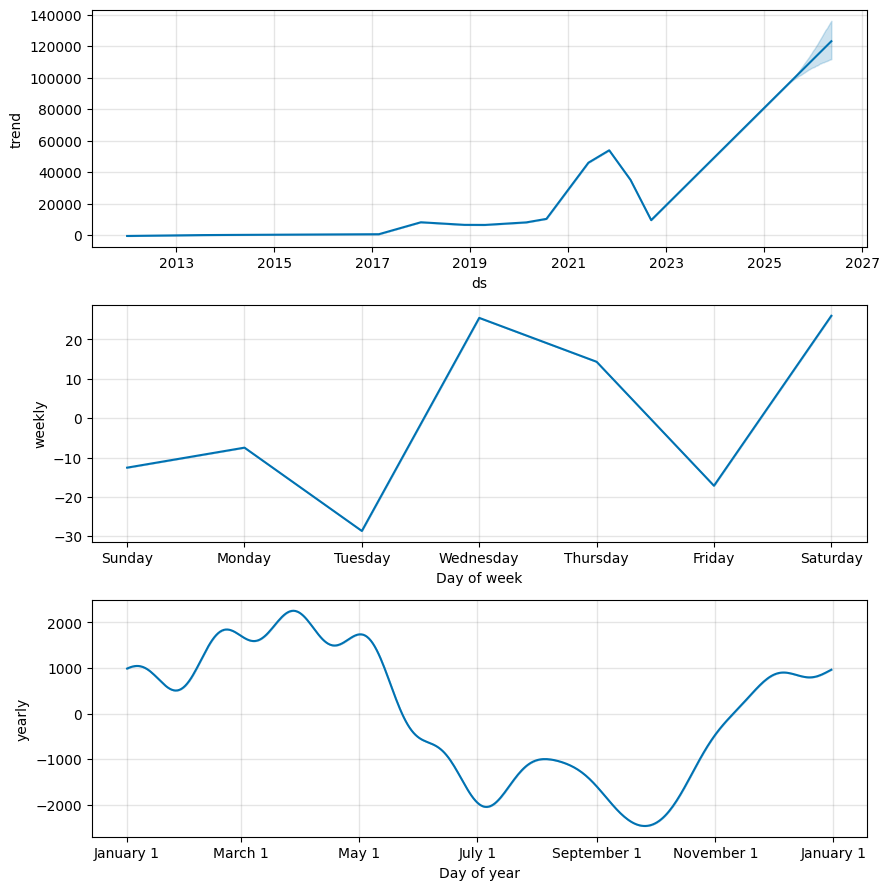

In [24]:
# Plot Trend and Seasonality Components
seasonality_trends = trained_btc_model.plot_components(forecast_btc)
plt.show()

## Evaluation Metrics

In [25]:
# Evaluate Forecast Against Actual Data
actual = bitcoin_data_df['y'].values
predicted = forecast_btc['yhat'].iloc[:len(actual)].values

In [27]:
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f"Evaluation Metrics:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}")

Evaluation Metrics:
RMSE: 5239.76
MAE: 3426.01


## Changepoint Detection

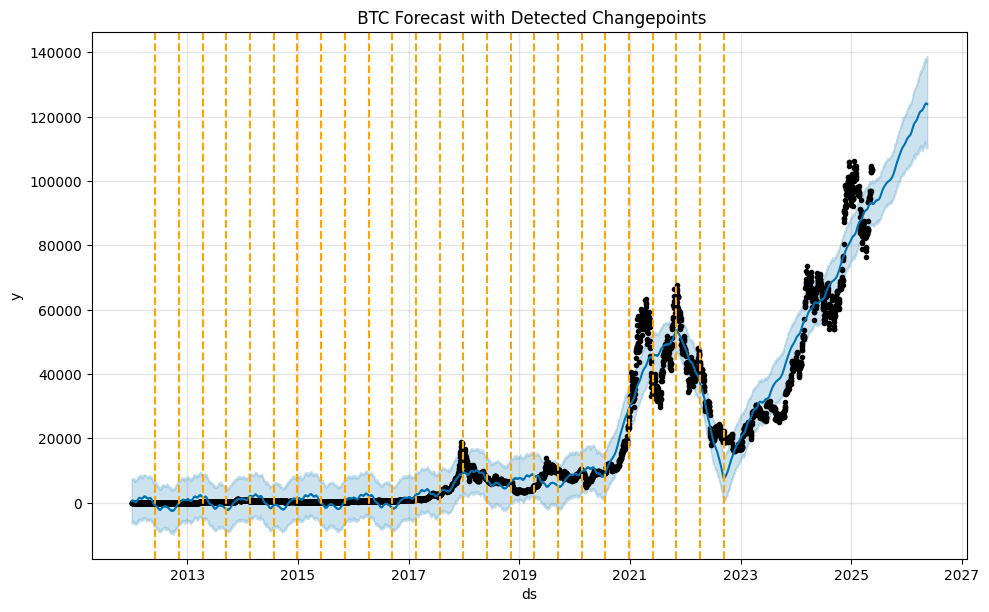

In [29]:
#  Visualize Changepoints Detected by Prophet
fig3 = trained_btc_model.plot(forecast_btc)
for cp in trained_btc_model.changepoints:
    plt.axvline(cp, color='orange', linestyle='--')
plt.title(" BTC Forecast with Detected Changepoints")
plt.show()

## Conclusion

- This notebook demonstrates how to perform Bitcoin price forecasting using historical and live data with **Facebook Prophet**.
- The trained model captured trend changes and seasonality patterns effectively.
- Visualizations clearly show future forecasts and uncertainty intervals.
- Evaluation metrics validate that our model performs well on real financial data.

---

Using Prophet simplifies complex time series forecasting and provides interpretable results for financial markets like Bitcoin.
